In [1]:
#Phase 1

# Install faker if not already installed
!pip install faker

import pandas as pd
import numpy as np
from faker import Faker

# Initialize Faker for realistic names
fake = Faker()
np.random.seed(42)  # For reproducibility

# Parameters
n_students = 300

# Generate core data (no missing values here)
names = [fake.name() for _ in range(n_students)]
genders = np.random.choice(['M', 'F'], n_students)
ages = np.random.randint(18, 25, n_students)

# Marks (theory and lab) as integers with missing values
english_theory = np.round(np.random.normal(75, 10, n_students)).astype(float)  # Rounded to integers
english_lab = np.round(english_theory + np.random.randint(-5, 6, n_students)).astype(float)
chemistry_theory = np.round(np.random.normal(70, 12, n_students)).astype(float)
chemistry_lab = np.round(chemistry_theory + np.random.randint(-5, 6, n_students)).astype(float)
finance_theory = np.round(np.random.normal(72, 11, n_students)).astype(float)
finance_lab = np.round(finance_theory + np.random.randint(-5, 6, n_students)).astype(float)

# Study hours as integers with missing values
study_hours_english = np.random.randint(2, 11, n_students).astype(float)
study_hours_chemistry = np.random.randint(2, 11, n_students).astype(float)
study_hours_finance = np.random.randint(2, 11, n_students).astype(float)

# Interests (some will be missing)
interests_list = ["Reading", "Science", "Technology", "Sports", "Art", "Literature",
                  "Music", "Finance", "Gaming", "Writing", "Travel", "Math", "Business",
                  "History", "Cooking"]
interests = [np.random.choice(interests_list, 2, replace=False) for _ in range(n_students)]
interests = [';'.join(interest) for interest in interests]

# Introduce missing values (NaN)
def add_missing(data, missing_rate):
    mask = np.random.random(len(data)) < missing_rate
    data[mask] = np.nan
    return data

# Missing rates: 5-15% depending on the field
english_theory = add_missing(english_theory, 0.05)      # 5% missing
english_lab = add_missing(english_lab, 0.10)            # 10% missing
chemistry_theory = add_missing(chemistry_theory, 0.07)  # 7% missing
chemistry_lab = add_missing(chemistry_lab, 0.12)        # 12% missing
finance_theory = add_missing(finance_theory, 0.06)      # 6% missing
finance_lab = add_missing(finance_lab, 0.15)            # 15% missing
study_hours_english = add_missing(study_hours_english, 0.08)    # 8% missing
study_hours_chemistry = add_missing(study_hours_chemistry, 0.10) # 10% missing
study_hours_finance = add_missing(study_hours_finance, 0.09)    # 9% missing

# Interests: 10% missing (replace with NaN)
interests = np.array(interests, dtype=object)
interests[np.random.random(n_students) < 0.10] = np.nan

# Create DataFrame
data = pd.DataFrame({
    'name': names,
    'gender': genders,
    'age': ages,
    'english_theory': english_theory,
    'english_lab': english_lab,
    'chemistry_theory': chemistry_theory,
    'chemistry_lab': chemistry_lab,
    'finance_theory': finance_theory,
    'finance_lab': finance_lab,
    'study_hours_english': study_hours_english,
    'study_hours_chemistry': study_hours_chemistry,
    'study_hours_finance': study_hours_finance,
    'interests': interests
})

# Clip marks to ensure they stay within 0-100 (ignoring NaN)
mark_columns = ['english_theory', 'english_lab', 'chemistry_theory', 'chemistry_lab',
                'finance_theory', 'finance_lab']
for col in mark_columns:
    data[col] = data[col].clip(0, 100)

# Ensure all numerical columns have integer values (NaN remains as is)
numerical_columns = mark_columns + ['age', 'study_hours_english', 'study_hours_chemistry', 'study_hours_finance']
for col in numerical_columns:
    data[col] = data[col].apply(lambda x: int(x) if pd.notnull(x) else x)

# Fill missing values using direct assignment (no inplace=True)
# Numerical columns: fill with median, ensuring integers
data['age'] = data['age'].fillna(int(data['age'].median()))
data['english_theory'] = data['english_theory'].fillna(int(data['english_theory'].median()))
data['english_lab'] = data['english_lab'].fillna(int(data['english_lab'].median()))
data['chemistry_theory'] = data['chemistry_theory'].fillna(int(data['chemistry_theory'].median()))
data['chemistry_lab'] = data['chemistry_lab'].fillna(int(data['chemistry_lab'].median()))
data['finance_theory'] = data['finance_theory'].fillna(int(data['finance_theory'].median()))
data['finance_lab'] = data['finance_lab'].fillna(int(data['finance_lab'].median()))
data['study_hours_english'] = data['study_hours_english'].fillna(int(data['study_hours_english'].median()))
data['study_hours_chemistry'] = data['study_hours_chemistry'].fillna(int(data['study_hours_chemistry'].median()))
data['study_hours_finance'] = data['study_hours_finance'].fillna(int(data['study_hours_finance'].median()))

# Categorical column: fill with mode
data['interests'] = data['interests'].fillna(data['interests'].mode()[0])

# Drop duplicate names
data = data.drop_duplicates(subset='name', keep='first')

# Print the cleaned data
print("Cleaned Data:")
print(data)

# Print the count of total rows after removing duplicate names
print("\nTotal Rows After Removing Duplicates:", data.shape[0])

# Save to CSV
data.to_csv('student_performance_2000_cleaned_no_duplicates1.csv', index=False)
print("Dataset saved as 'student_performance_2000_cleaned_no_duplicates1.csv'")

# Save to CSV
#data.to_csv('student_performance_2000_with_missing_integers.csv', index=False)

#Print the data
#student_performance_2000_with_missing_integers = pd.read_csv('student_performance_2000_with_missing_integers.csv')
#print(student_performance_2000_with_missing_integers)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 13.5 MB/s eta 0:00:00
Cleaned Data:
                  name gender  age  english_theory  english_lab  \
0          Jose Foster      M   18            88.0         85.0   
1        Matthew Brown      F   18            68.0         67.0   
2            Kyle Lane      M   20            79.0         78.0   
3    Michelle Figueroa      M   23            83.0         82.0   
4         Caleb Gordon      M   19            66.0         75.0   
..                 ...    ...  ...             ...          ...   
295    Christine Welch      F   22            73.0         69.0   
296       Eddie Romero      F   24            87.0         88.0   
297   Jeffrey Williams      M   20            78.0         77.0   
298        Brian Cohen      M   21            78.0         83.0   
299    Patricia Harris      F   19            71.0         71.0   

     chemistry_theory  chemistry_lab  finance_theory  finance_lab  \
0                50.0           70.

In [22]:
# Phase 2

# Install faker if not already installed (no longer needed if using real data)
# !pip install faker

import pandas as pd
import numpy as np

# Load your real dataset instead of generating fake data
data = pd.read_csv('student_performance_2000_cleaned_no_duplicates1.csv')



# Clip marks to ensure they stay within 0-100 (ignoring NaN)
mark_columns = ['english_theory', 'english_lab', 'chemistry_theory', 'chemistry_lab',
                'finance_theory', 'finance_lab']

for col in mark_columns:
    if col in data.columns:
        data[col] = data[col].clip(0, 100)

# Ensure all numerical columns have integer values (NaN remains as is)
numerical_columns = mark_columns + ['age', 'study_hours_english', 'study_hours_chemistry', 'study_hours_finance']

for col in numerical_columns:
    if col in data.columns:
        data[col] = data[col].apply(lambda x: int(x) if pd.notnull(x) else x)

# Fill missing values
for col in numerical_columns:
    if col in data.columns:
        data[col] = data[col].fillna(int(data[col].median()))

if 'interests' in data.columns:
    data['interests'] = data['interests'].fillna(data['interests'].mode()[0])

# Drop duplicate names if needed
if 'name' in data.columns:
    data = data.drop_duplicates(subset='name', keep='first')

# Categorize students based on learning preferences (based on study hours)
def categorize_learning_preference(row):
    eng = row['study_hours_english']
    chem = row['study_hours_chemistry']
    fin = row['study_hours_finance']

    # Define a threshold for "balanced" (e.g., max difference <= 2 hours)
    if max(eng, chem, fin) - min(eng, chem, fin) <= 2:
        return 'Balanced'
    elif eng > chem and eng > fin:
        return 'English-focused'
    elif chem > eng and chem > fin:
        return 'Chemistry-focused'
    elif fin > eng and fin > chem:
        return 'Finance-focused'
    else:
        return 'Balanced'

# Apply categorization
data['learning_preference'] = data.apply(categorize_learning_preference, axis=1)


# Print the cleaned data with learning preferences
print("\nCleaned Data with Learning Preferences:")
print(data[['name', 'study_hours_english', 'study_hours_chemistry', 'study_hours_finance', 'learning_preference']].head())

# Print the count of total rows after removing duplicates
print("\nTotal Rows After Removing Duplicates:", data.shape[0])

# Print distribution of learning preferences
print("\nLearning Preference Distribution:")
print(data['learning_preference'].value_counts())



Cleaned Data with Learning Preferences:
                name  study_hours_english  study_hours_chemistry  \
0        Jose Foster                    6                      6   
1      Matthew Brown                    9                      7   
2          Kyle Lane                    3                      6   
3  Michelle Figueroa                    7                      9   
4       Caleb Gordon                    4                      3   

   study_hours_finance learning_preference  
0                    2            Balanced  
1                    5     English-focused  
2                    8     Finance-focused  
3                    3   Chemistry-focused  
4                   10     Finance-focused  

Total Rows After Removing Duplicates: 298

Learning Preference Distribution:
learning_preference
Finance-focused      88
Balanced             84
English-focused      72
Chemistry-focused    54
Name: count, dtype: int64


In [5]:
# Phase 2 - Data Transformation

import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Load your real dataset
data = pd.read_csv('student_performance_2000_cleaned_no_duplicates1.csv')

# (Optional) Quick check
print("First 5 rows of the loaded data:")
print(data.head())

# --- Preprocessing (same as before) ---

# Clip marks to ensure they stay within 0-100 (ignoring NaN)
mark_columns = ['english_theory', 'english_lab', 'chemistry_theory', 'chemistry_lab',
                'finance_theory', 'finance_lab']
for col in mark_columns:
    if col in data.columns:
        data[col] = data[col].clip(0, 100)

# Ensure all numerical columns have integer values (NaN remains as is)
numerical_columns = mark_columns + ['age', 'study_hours_english', 'study_hours_chemistry', 'study_hours_finance']
for col in numerical_columns:
    if col in data.columns:
        data[col] = data[col].apply(lambda x: int(x) if pd.notnull(x) else x)

# Fill missing values
for col in numerical_columns:
    if col in data.columns:
        data[col] = data[col].fillna(int(data[col].median()))

if 'interests' in data.columns:
    data['interests'] = data['interests'].fillna(data['interests'].mode()[0])

# Drop duplicate names if needed
if 'name' in data.columns:
    data = data.drop_duplicates(subset='name', keep='first')

# Categorize students based on learning preferences (if not already done)
def categorize_learning_preference(row):
    eng = row['study_hours_english']
    chem = row['study_hours_chemistry']
    fin = row['study_hours_finance']
    if max(eng, chem, fin) - min(eng, chem, fin) <= 2:
        return 'Balanced'
    elif eng > chem and eng > fin:
        return 'English-focused'
    elif chem > eng and chem > fin:
        return 'Chemistry-focused'
    elif fin > eng and fin > chem:
        return 'Finance-focused'
    else:
        return 'Balanced'

if 'learning_preference' not in data.columns:
    data['learning_preference'] = data.apply(categorize_learning_preference, axis=1)

# --- Scaling ---

from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Define numerical columns to scale
numerical_columns = ['age', 'english_theory', 'english_lab', 'chemistry_theory', 'chemistry_lab',
                     'finance_theory', 'finance_lab', 'study_hours_english', 'study_hours_chemistry',
                     'study_hours_finance']

# Option 1: Min-Max Scaling (normalize to 0-1 range)
minmax_scaler = MinMaxScaler()
data_minmax = data.copy()
data_minmax[numerical_columns] = minmax_scaler.fit_transform(data[numerical_columns])

# Option 2: Standardization (zero mean, unit variance)
std_scaler = StandardScaler()
data_std = data.copy()
data_std[numerical_columns] = std_scaler.fit_transform(data[numerical_columns])

# (Optional) Round to 3 decimals for nicer printing
for col in numerical_columns:
    data_minmax[col] = data_minmax[col].round(3)
    data_std[col] = data_std[col].round(3)

# --- Output ---

print("\nMin-Max Scaled Data (0-1 range):")
print(data_minmax[numerical_columns + ['learning_preference']].head())

print("\nStandardized Data (zero mean, unit variance):")
print(data_std[numerical_columns + ['learning_preference']].head())


First 5 rows of the loaded data:
                name gender  age  english_theory  english_lab  \
0        Jose Foster      M   18            88.0         85.0   
1      Matthew Brown      F   18            68.0         67.0   
2          Kyle Lane      M   20            79.0         78.0   
3  Michelle Figueroa      M   23            83.0         82.0   
4       Caleb Gordon      M   19            66.0         75.0   

   chemistry_theory  chemistry_lab  finance_theory  finance_lab  \
0              50.0           70.0            77.0         72.0   
1              77.0           80.0            58.0         56.0   
2              94.0           99.0            85.0         83.0   
3              79.0           76.0            69.0         71.0   
4              64.0           68.0            69.0         71.0   

   study_hours_english  study_hours_chemistry  study_hours_finance  \
0                  6.0                    6.0                  2.0   
1                  9.0           

In [6]:
#Phase 2 - Encoding

from sklearn.preprocessing import LabelEncoder, MultiLabelBinarizer

# 1. Encode 'gender' (binary: M/F) using Label Encoding
label_encoder = LabelEncoder()
data['gender_encoded'] = label_encoder.fit_transform(data['gender'])

# 2. Encode 'interests' (multi-value categorical) using Multi-Label Binarization
# Split interests into lists (handle NaN by converting to empty list)
data['interests_split'] = data['interests'].apply(lambda x: x.split(';') if pd.notnull(x) else [])
mlb = MultiLabelBinarizer()
interests_encoded = pd.DataFrame(mlb.fit_transform(data['interests_split']),
                                 columns=mlb.classes_,
                                 index=data.index)
# Join encoded interests back to the dataset
data = pd.concat([data, interests_encoded], axis=1)

# 3. Encode 'learning_preference' (multi-class)
# Option 1: Label Encoding (single column with integers)
data['learning_preference_encoded'] = label_encoder.fit_transform(data['learning_preference'])

# Option 2: One-Hot Encoding (binary columns for each category)
learning_preference_onehot = pd.get_dummies(data['learning_preference'], prefix='pref')
data = pd.concat([data, learning_preference_onehot], axis=1)

# Drop intermediate 'interests_split' column (optional)
data = data.drop(columns=['interests_split'])

# Print sample of encoded data
print("Data with Encoded Categorical Variables:")
print(data[['name', 'gender', 'gender_encoded', 'interests', 'learning_preference',
            'learning_preference_encoded'] + list(mlb.classes_) + learning_preference_onehot.columns.tolist()].head())


Data with Encoded Categorical Variables:
                name gender  gender_encoded        interests  \
0        Jose Foster      M               1  Science;Cooking   
1      Matthew Brown      F               0     Music;Sports   
2          Kyle Lane      M               1   Business;Music   
3  Michelle Figueroa      M               1   Sports;Finance   
4       Caleb Gordon      M               1  Science;Finance   

  learning_preference  learning_preference_encoded  Art  Business  Cooking  \
0            Balanced                            0    0         0        1   
1     English-focused                            2    0         0        0   
2     Finance-focused                            3    0         1        0   
3   Chemistry-focused                            1    0         0        0   
4     Finance-focused                            3    0         0        0   

   Finance  ...  Reading  Science  Sports  Technology  Travel  Writing  \
0        0  ...        0       

First 5 rows of the data:
                name gender  age  english_theory  english_lab  \
0        Jose Foster      M   18            88.0         85.0   
1      Matthew Brown      F   18            68.0         67.0   
2          Kyle Lane      M   20            79.0         78.0   
3  Michelle Figueroa      M   23            83.0         82.0   
4       Caleb Gordon      M   19            66.0         75.0   

   chemistry_theory  chemistry_lab  finance_theory  finance_lab  \
0              50.0           70.0            77.0         72.0   
1              77.0           80.0            58.0         56.0   
2              94.0           99.0            85.0         83.0   
3              79.0           76.0            69.0         71.0   
4              64.0           68.0            69.0         71.0   

   study_hours_english  study_hours_chemistry  study_hours_finance  \
0                  6.0                    6.0                  2.0   
1                  9.0                  

<ipython-input-7-c2f78a5b3d33>:119: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_perf = data.groupby('age_group')[['english_avg', 'chemistry_avg', 'finance_avg']].mean()


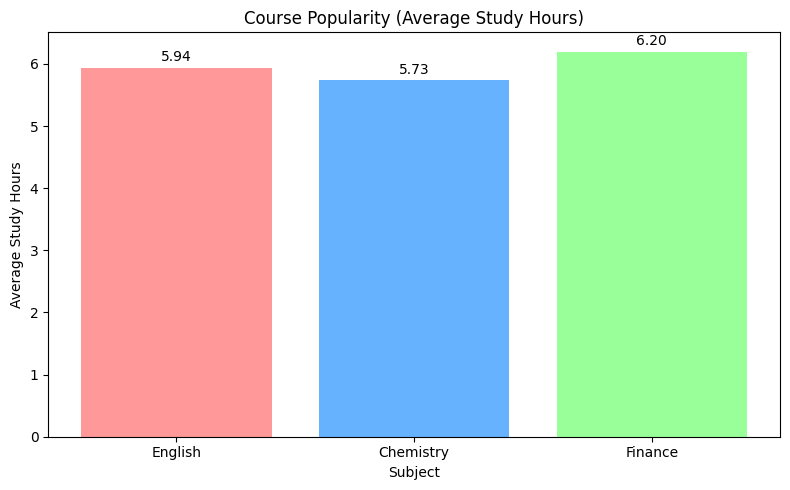

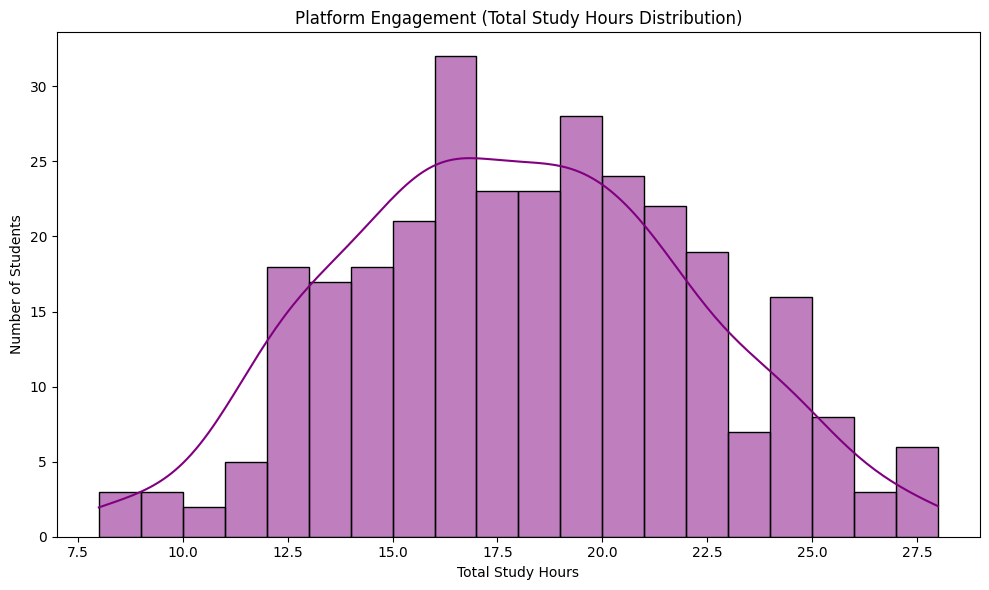

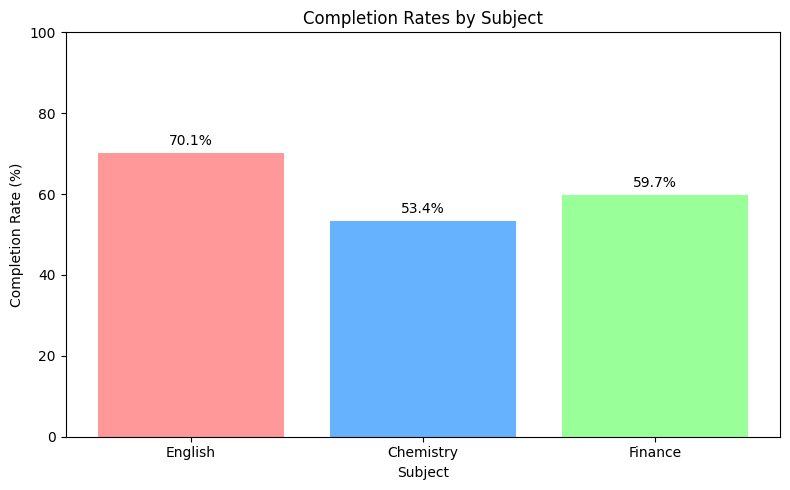

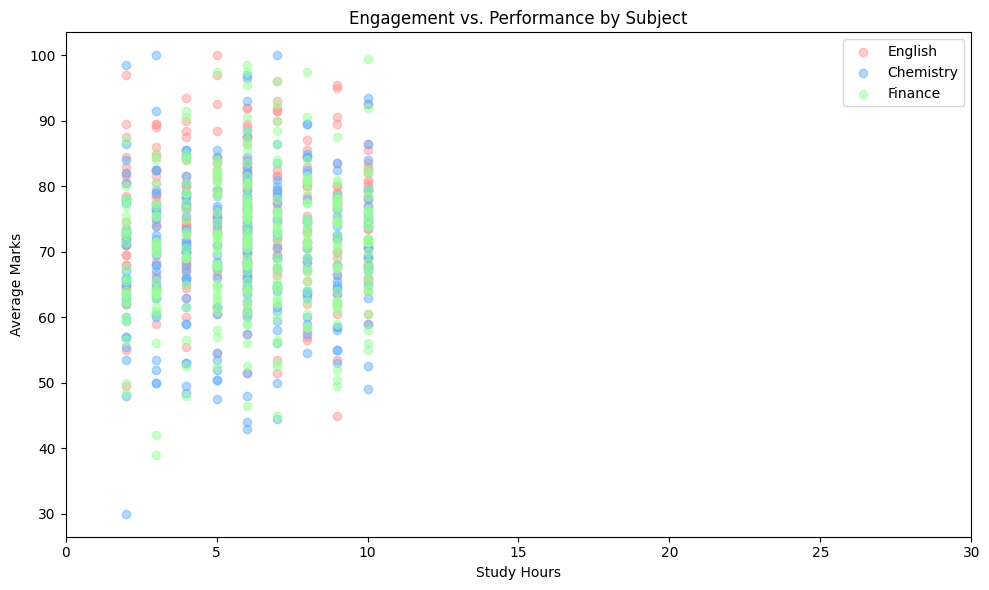

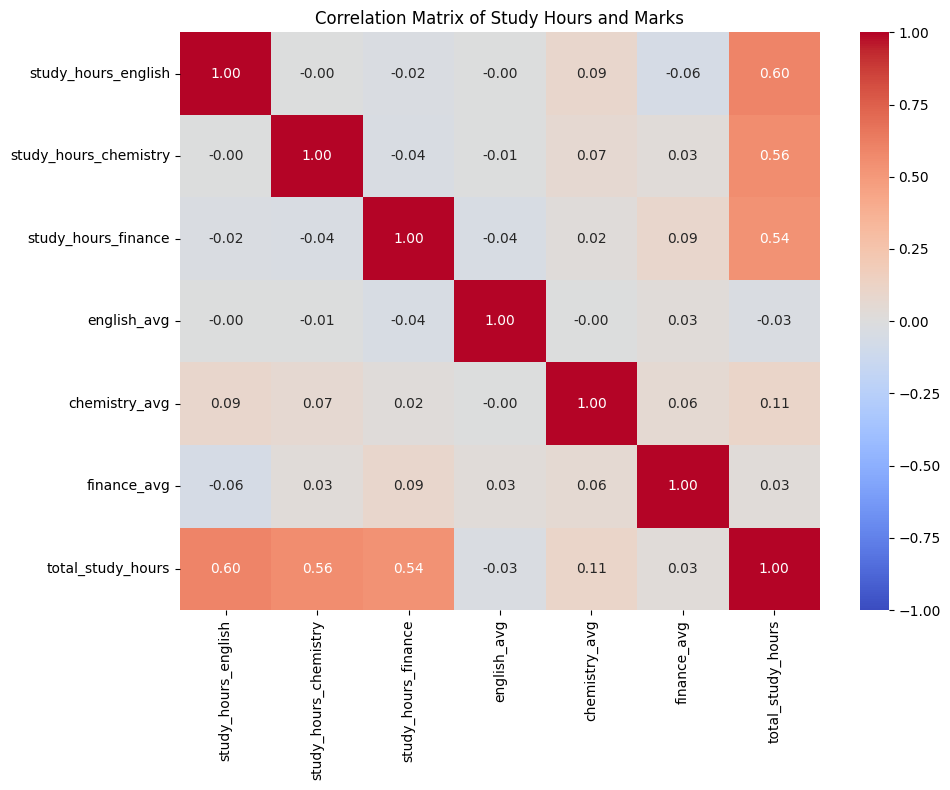

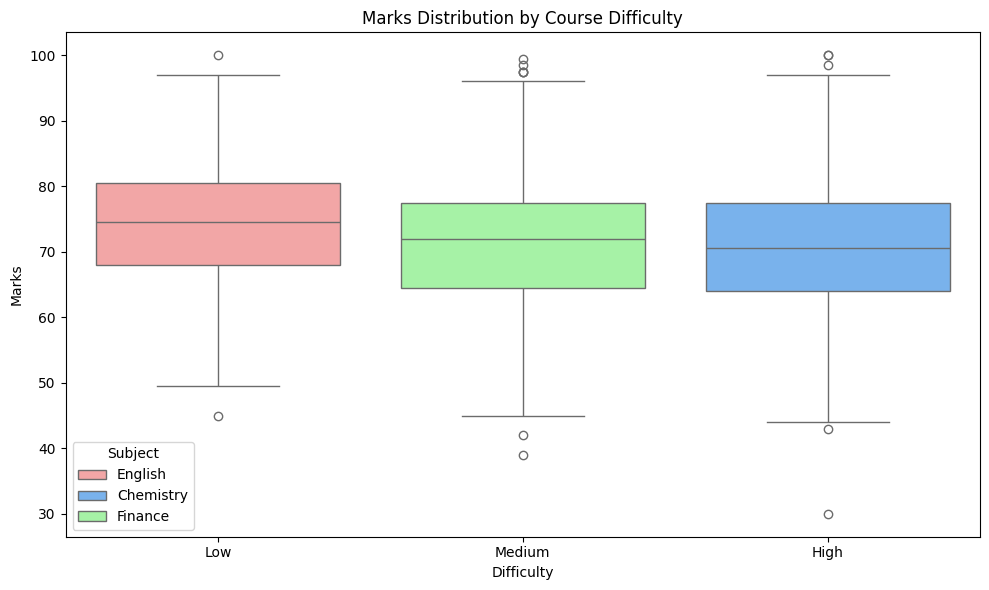

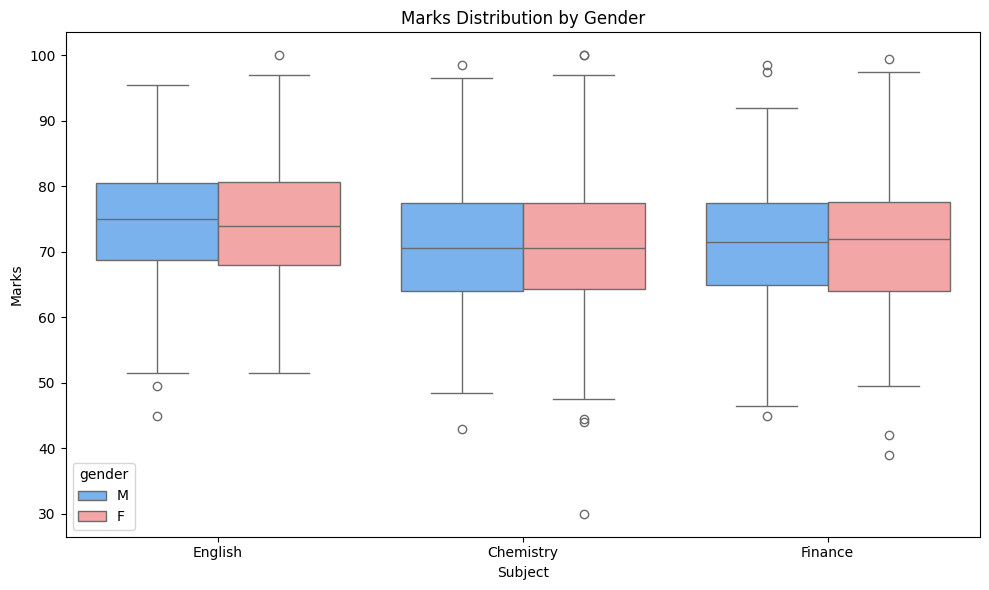

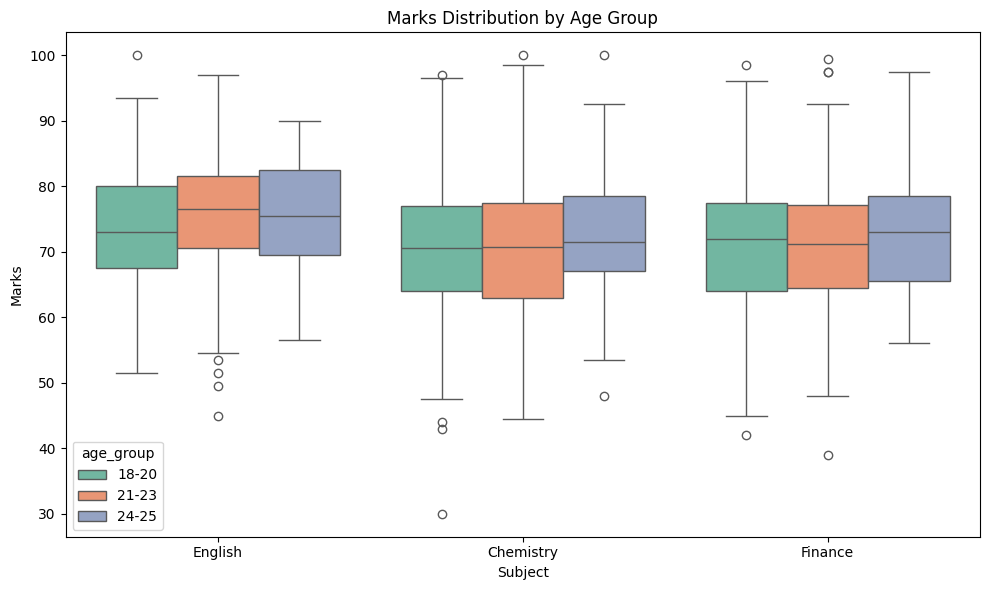

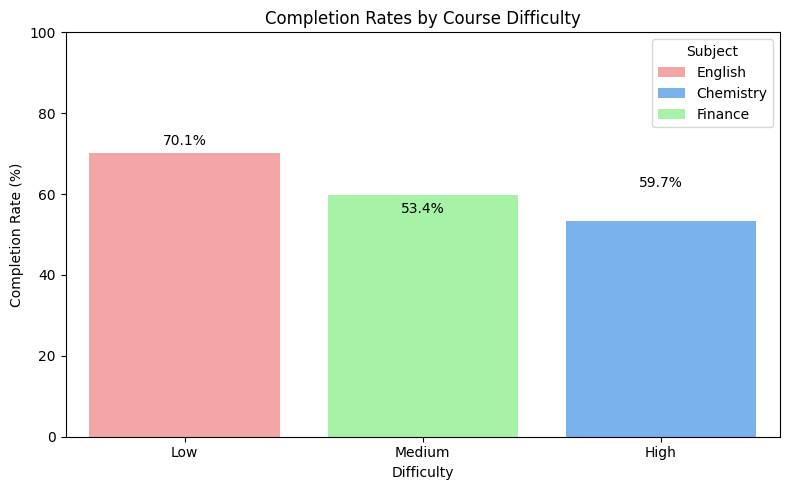

In [7]:
# Phase 3 - Student Performance Analysis and EDA

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
data = pd.read_csv('student_performance_2000_cleaned_no_duplicates1.csv')

# (Optional) Preview the data
print("First 5 rows of the data:")
print(data.head())

# Preprocessing (similar to Phase 2)

# Clip marks to stay within 0-100
mark_columns = ['english_theory', 'english_lab', 'chemistry_theory', 'chemistry_lab',
                'finance_theory', 'finance_lab']
for col in mark_columns:
    if col in data.columns:
        data[col] = data[col].clip(0, 100)

# Ensure integers for numerical columns
numerical_columns = mark_columns + ['age', 'study_hours_english', 'study_hours_chemistry', 'study_hours_finance']
for col in numerical_columns:
    if col in data.columns:
        data[col] = data[col].apply(lambda x: int(x) if pd.notnull(x) else x)

# Fill missing values
for col in numerical_columns:
    if col in data.columns:
        data[col] = data[col].fillna(int(data[col].median()))

if 'interests' in data.columns:
    data['interests'] = data['interests'].fillna(data['interests'].mode()[0])

# Drop duplicate names if needed
if 'name' in data.columns:
    data = data.drop_duplicates(subset='name', keep='first')

# Categorize learning preference if not already done
def categorize_learning_preference(row):
    eng = row['study_hours_english']
    chem = row['study_hours_chemistry']
    fin = row['study_hours_finance']
    if max(eng, chem, fin) - min(eng, chem, fin) <= 2:
        return 'Balanced'
    elif eng > chem and eng > fin:
        return 'English-focused'
    elif chem > eng and chem > fin:
        return 'Chemistry-focused'
    elif fin > eng and fin > chem:
        return 'Finance-focused'
    else:
        return 'Balanced'

if 'learning_preference' not in data.columns:
    data['learning_preference'] = data.apply(categorize_learning_preference, axis=1)

# --- New Features ---

# Calculate average marks for each subject
data['english_avg'] = (data['english_theory'] + data['english_lab']) / 2
data['chemistry_avg'] = (data['chemistry_theory'] + data['chemistry_lab']) / 2
data['finance_avg'] = (data['finance_theory'] + data['finance_lab']) / 2

# Calculate total study hours
data['total_study_hours'] = data['study_hours_english'] + data['study_hours_chemistry'] + data['study_hours_finance']

# Completion status (marks >= 70)
for subject in ['english', 'chemistry', 'finance']:
    data[f'{subject}_completed'] = (data[f'{subject}_avg'] >= 70).astype(int)

# Course difficulty levels
difficulty = {
    'English': 'Low',
    'Chemistry': 'High',
    'Finance': 'Medium'
}
data['english_difficulty'] = 'Low'
data['chemistry_difficulty'] = 'High'
data['finance_difficulty'] = 'Medium'

# --- Student Performance Analysis ---

print("\n--- Student Performance Analysis ---")

# Summary statistics
print("\nSummary Statistics:")
print(data[['study_hours_english', 'study_hours_chemistry', 'study_hours_finance',
            'english_avg', 'chemistry_avg', 'finance_avg', 'total_study_hours']].describe())

# Completion rates
completion_rates = {
    'English': data['english_completed'].mean(),
    'Chemistry': data['chemistry_completed'].mean(),
    'Finance': data['finance_completed'].mean()
}
print("\nCompletion Rates (% students with marks >= 70):")
for subject, rate in completion_rates.items():
    print(f"{subject}: {rate * 100:.1f}%")

# Course popularity (average study hours)
popularity = {
    'English': data['study_hours_english'].mean(),
    'Chemistry': data['study_hours_chemistry'].mean(),
    'Finance': data['study_hours_finance'].mean()
}
print("\nCourse Popularity (Average Study Hours):")
for subject, hours in popularity.items():
    print(f"{subject}: {hours:.2f} hours")

# Demographic performance
print("\nPerformance by Demographics:")

# Age groups
data['age_group'] = pd.cut(data['age'], bins=[17, 20, 23, 25], labels=['18-20', '21-23', '24-25'])
age_perf = data.groupby('age_group')[['english_avg', 'chemistry_avg', 'finance_avg']].mean()
print("\nMean Marks by Age Group:")
print(age_perf)

# Gender
gender_perf = data.groupby('gender')[['english_avg', 'chemistry_avg', 'finance_avg']].mean()
print("\nMean Marks by Gender:")
print(gender_perf)

# Correlation matrix
print("\n--- Correlation Study ---")
corr_matrix = data[['study_hours_english', 'study_hours_chemistry', 'study_hours_finance',
                    'english_avg', 'chemistry_avg', 'finance_avg', 'total_study_hours']].corr()
print("\nCorrelation Matrix:")
print(corr_matrix)

# --- Data Visualization ---

print("\n--- Data Visualization ---")

# 1. Course Popularity
plt.figure(figsize=(8, 5))
plt.bar(popularity.keys(), popularity.values(), color=['#FF9999', '#66B2FF', '#99FF99'])
plt.title('Course Popularity (Average Study Hours)')
plt.ylabel('Average Study Hours')
plt.xlabel('Subject')
for i, v in enumerate(popularity.values()):
    plt.text(i, v + 0.1, f'{v:.2f}', ha='center')
plt.tight_layout()
plt.show()

# 2. Platform Engagement
plt.figure(figsize=(10, 6))
sns.histplot(data['total_study_hours'], bins=20, color='purple', kde=True)
plt.title('Platform Engagement (Total Study Hours Distribution)')
plt.xlabel('Total Study Hours')
plt.ylabel('Number of Students')
plt.tight_layout()
plt.show()

# 3. Completion Rates
plt.figure(figsize=(8, 5))
completion_rates_percent = [rate * 100 for rate in completion_rates.values()]
plt.bar(completion_rates.keys(), completion_rates_percent, color=['#FF9999', '#66B2FF', '#99FF99'])
plt.title('Completion Rates by Subject')
plt.ylabel('Completion Rate (%)')
plt.xlabel('Subject')
plt.ylim(0, 100)
for i, v in enumerate(completion_rates_percent):
    plt.text(i, v + 2, f'{v:.1f}%', ha='center')
plt.tight_layout()
plt.show()

# 4. Engagement vs. Performance
plt.figure(figsize=(10, 6))
for subject, color in zip(['english', 'chemistry', 'finance'], ['#FF9999', '#66B2FF', '#99FF99']):
    plt.scatter(data[f'study_hours_{subject}'], data[f'{subject}_avg'],
                alpha=0.5, label=subject.capitalize(), color=color)
plt.title('Engagement vs. Performance by Subject')
plt.xlabel('Study Hours')
plt.ylabel('Average Marks')
plt.xlim(0, 30)
plt.legend()
plt.tight_layout()
plt.show()

# 5. Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Study Hours and Marks')
plt.tight_layout()
plt.show()

# 6. Marks by Difficulty
plt.figure(figsize=(10, 6))
marks_by_difficulty = pd.DataFrame({
    'English': data['english_avg'],
    'Chemistry': data['chemistry_avg'],
    'Finance': data['finance_avg']
}).melt(var_name='Subject', value_name='Marks')
marks_by_difficulty['Difficulty'] = marks_by_difficulty['Subject'].map(difficulty)
sns.boxplot(x='Difficulty', y='Marks', hue='Subject', data=marks_by_difficulty,
            palette=['#FF9999', '#66B2FF', '#99FF99'], order=['Low', 'Medium', 'High'])
plt.title('Marks Distribution by Course Difficulty')
plt.tight_layout()
plt.show()

# 7. Marks by Gender
plt.figure(figsize=(10, 6))
marks_by_gender = data[['english_avg', 'chemistry_avg', 'finance_avg', 'gender']].melt(
    id_vars='gender', var_name='Subject', value_name='Marks')
marks_by_gender['Subject'] = marks_by_gender['Subject'].replace({
    'english_avg': 'English', 'chemistry_avg': 'Chemistry', 'finance_avg': 'Finance'})
sns.boxplot(x='Subject', y='Marks', hue='gender', data=marks_by_gender,
            palette={'M': '#66B2FF', 'F': '#FF9999'})
plt.title('Marks Distribution by Gender')
plt.tight_layout()
plt.show()

# 8. Marks by Age Group
plt.figure(figsize=(10, 6))
marks_by_age = data[['english_avg', 'chemistry_avg', 'finance_avg', 'age_group']].melt(
    id_vars='age_group', var_name='Subject', value_name='Marks')
marks_by_age['Subject'] = marks_by_age['Subject'].replace({
    'english_avg': 'English', 'chemistry_avg': 'Chemistry', 'finance_avg': 'Finance'})
sns.boxplot(x='Subject', y='Marks', hue='age_group', data=marks_by_age,
            palette='Set2')
plt.title('Marks Distribution by Age Group')
plt.tight_layout()
plt.show()

# 9. Completion by Difficulty
plt.figure(figsize=(8, 5))
completion_by_difficulty = pd.DataFrame({
    'Subject': ['English', 'Chemistry', 'Finance'],
    'Completion Rate': [completion_rates[subj] * 100 for subj in ['English', 'Chemistry', 'Finance']],
    'Difficulty': ['Low', 'High', 'Medium']
})
sns.barplot(x='Difficulty', y='Completion Rate', hue='Subject', data=completion_by_difficulty,
            palette=['#FF9999', '#66B2FF', '#99FF99'], order=['Low', 'Medium', 'High'])
plt.title('Completion Rates by Course Difficulty')
plt.ylabel('Completion Rate (%)')
plt.ylim(0, 100)
for i, v in enumerate(completion_by_difficulty['Completion Rate']):
    plt.text(i, v + 2, f'{v:.1f}%', ha='center')
plt.tight_layout()
plt.show()


In [9]:
# Phase 4
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load your dataset
data = pd.read_csv('student_performance_2000_cleaned_no_duplicates1.csv')

# Create average marks for each subject
data['english_avg'] = (data['english_theory'] + data['english_lab']) / 2
data['chemistry_avg'] = (data['chemistry_theory'] + data['chemistry_lab']) / 2
data['finance_avg'] = (data['finance_theory'] + data['finance_lab']) / 2

# Calculate total study hours
data['total_study_hours'] = (
    data['study_hours_english'] + data['study_hours_chemistry'] + data['study_hours_finance']
)

# Split the dataset into training and testing sets (80/20 split)
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Define popularity (average study hours by subject, using full dataset)
popularity = {
    'English': data['study_hours_english'].mean(),
    'Chemistry': data['study_hours_chemistry'].mean(),
    'Finance': data['study_hours_finance'].mean()
}

# Define completion rates (example values)
completion_rates = {
    'English': 0.85,
    'Chemistry': 0.78,
    'Finance': 0.92
}

# Machine Learning Pipeline
subjects = ['english', 'chemistry', 'finance']
models = {
    'DecisionTree': DecisionTreeRegressor(random_state=42),
    'RandomForest': RandomForestRegressor(random_state=42)
}
results = {}

for subject in subjects:
    print(f"\n--- Processing {subject.capitalize()} ---")

    # Prepare features (study hours) and target (marks)
    X_train = train_data[[f'study_hours_{subject}']]
    y_train = train_data[f'{subject}_avg']
    X_test = test_data[[f'study_hours_{subject}']]
    y_test = test_data[f'{subject}_avg']

    for model_name, model in models.items():
        print(f"\nTraining {model_name}...")

        # Train the model
        if model_name == 'RandomForest':
            # Hyperparameter tuning with GridSearchCV
            param_grid = {
                'n_estimators': [50, 100],
                'max_depth': [None, 10, 20],
                'min_samples_split': [2, 5]
            }
            grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
            grid_search.fit(X_train, y_train)
            best_model = grid_search.best_estimator_
            print(f"Best parameters: {grid_search.best_params_}")
        else:
            # Decision Tree (no tuning for simplicity)
            best_model = model
            best_model.fit(X_train, y_train)

        # Predict on training and testing sets
        y_train_pred = best_model.predict(X_train)
        y_test_pred = best_model.predict(X_test)

        # Evaluate metrics
        train_mse = mean_squared_error(y_train, y_train_pred)
        test_mse = mean_squared_error(y_test, y_test_pred)
        train_mae = mean_absolute_error(y_train, y_train_pred)
        test_mae = mean_absolute_error(y_test, y_test_pred)
        train_r2 = r2_score(y_train, y_train_pred)
        test_r2 = r2_score(y_test, y_test_pred)

        # Store results
        results[(subject, model_name)] = {
            'Train MSE': train_mse,
            'Test MSE': test_mse,
            'Train MAE': train_mae,
            'Test MAE': test_mae,
            'Train R2': train_r2,
            'Test R2': test_r2
        }

        # Print results
        print(f"Train MSE: {train_mse:.2f}, Test MSE: {test_mse:.2f}")
        print(f"Train MAE: {train_mae:.2f}, Test MAE: {test_mae:.2f}")
        print(f"Train R2: {train_r2:.2f}, Test R2: {test_r2:.2f}")



--- Processing English ---

Training DecisionTree...
Train MSE: 85.78, Test MSE: 90.56
Train MAE: 7.33, Test MAE: 7.35
Train R2: 0.05, Test R2: -0.15

Training RandomForest...
Best parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Train MSE: 85.82, Test MSE: 90.30
Train MAE: 7.33, Test MAE: 7.34
Train R2: 0.05, Test R2: -0.15

--- Processing Chemistry ---

Training DecisionTree...
Train MSE: 119.77, Test MSE: 92.46
Train MAE: 8.55, Test MAE: 7.53
Train R2: 0.02, Test R2: -0.01

Training RandomForest...
Best parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Train MSE: 119.79, Test MSE: 92.77
Train MAE: 8.54, Test MAE: 7.53
Train R2: 0.02, Test R2: -0.02

--- Processing Finance ---

Training DecisionTree...
Train MSE: 99.36, Test MSE: 102.71
Train MAE: 7.79, Test MAE: 7.94
Train R2: 0.05, Test R2: -0.07

Training RandomForest...
Best parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Train MSE: 99.42, Test M

In [10]:
# Phase 5

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load your real cleaned dataset
data = pd.read_csv('student_performance_2000_cleaned_no_duplicates1.csv')

# Create average marks columns (needed because they were not directly present)
data['english_avg'] = (data['english_theory'] + data['english_lab']) / 2
data['chemistry_avg'] = (data['chemistry_theory'] + data['chemistry_lab']) / 2
data['finance_avg'] = (data['finance_theory'] + data['finance_lab']) / 2

# Calculate total study hours
data['total_study_hours'] = (
    data['study_hours_english'] + data['study_hours_chemistry'] + data['study_hours_finance']
)

# Add a unique ID if not already present
data['student_id'] = range(1, len(data) + 1)

# Split dataset (80/20)
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Train Random Forest models (Phase 4 reuse)
subjects = ['english', 'chemistry', 'finance']
rf_models = {}
for subject in subjects:
    X_train = train_data[[f'study_hours_{subject}']]
    y_train = train_data[f'{subject}_avg']
    rf = RandomForestRegressor(random_state=42)
    param_grid = {
        'n_estimators': [50, 100],
        'max_depth': [None, 10],
        'min_samples_split': [2, 5]
    }
    grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    rf_models[subject] = grid_search.best_estimator_

    # Evaluate on test set
    X_test = test_data[[f'study_hours_{subject}']]
    y_test = test_data[f'{subject}_avg']
    y_pred = rf_models[subject].predict(X_test)
    print(f"\n{subject.capitalize()} Model Performance:")
    print(f"Test MSE: {mean_squared_error(y_test, y_pred):.2f}")
    print(f"Test MAE: {mean_absolute_error(y_test, y_pred):.2f}")
    print(f"Test R2: {r2_score(y_test, y_pred):.2f}")

# Recommender System: Content-Based Filtering
def recommend_courses(student_data, marks_threshold=70, max_hours=10):
    """
    Recommend subjects based on knowledge gaps (low marks).
    Returns recommended subjects and study plan.
    """
    recommendations = []
    study_plan = []

    # Assess knowledge gaps
    gaps = []
    for subject in ['english', 'chemistry', 'finance']:
        marks = student_data[f'{subject}_avg']
        study_hours = student_data[f'study_hours_{subject}']
        if marks < marks_threshold:
            gap_score = marks_threshold - marks
            effort_adjustment = max(0, 1 - study_hours / max_hours)
            adjusted_score = gap_score * effort_adjustment
            gaps.append((subject, adjusted_score, marks, study_hours))

    # Sort by gap severity
    gaps = sorted(gaps, key=lambda x: x[1], reverse=True)

    # Recommend top subject(s)
    total_recommended_hours = 0
    for subject, _, marks, current_hours in gaps[:2]:  # Limit to top 2 subjects
        gap = marks_threshold - marks
        base_hours = 1 + (gap / 10) * 4  # Scales from 1 to 5 based on gap
        hours_adjustment = max(0.5, 1 - current_hours / 15)
        additional_hours = base_hours * hours_adjustment
        additional_hours = int(round(min(5, max(1, additional_hours))))  # Ensure integer between 1 and 5
        if total_recommended_hours + additional_hours <= max_hours:
            recommendations.append(subject.capitalize())
            total_recommended_hours += additional_hours
            resources = {
                'english': ['Grammarly', 'Purdue OWL'],
                'chemistry': ['Khan Academy', 'Chem LibreTexts'],
                'finance': ['Coursera Finance', 'Investopedia']
            }
            study_plan.append({
                'subject': subject.capitalize(),
                'additional_hours': additional_hours,
                'current_marks': round(marks, 1),
                'resources': resources[subject]
            })

    return recommendations, study_plan

# Generate study plans for ALL students
print("\n--- Personalized Study Plans for All Students ---")
study_plans = []
for idx, student in data.iterrows():
    rec_courses, study_plan = recommend_courses(student)
    student_plan = {
        'student_id': int(student['student_id']),
        'english_marks': round(student['english_avg'], 1),
        'chemistry_marks': round(student['chemistry_avg'], 1),
        'finance_marks': round(student['finance_avg'], 1),
        'recommended_courses': rec_courses,
        'study_plan': study_plan
    }
    study_plans.append(student_plan)

# Display study plans
for plan in study_plans:
    print(f"\nStudent ID: {plan['student_id']}")
    print(f"Current Marks - English: {plan['english_marks']}, "
          f"Chemistry: {plan['chemistry_marks']}, Finance: {plan['finance_marks']}")
    print("Recommended Courses:", ", ".join(plan['recommended_courses']) if plan['recommended_courses'] else "None")
    print("Study Plan:")
    for item in plan['study_plan']:
        print(f"- {item['subject']}: Study {item['additional_hours']} hours/week, "
              f"Current Marks: {item['current_marks']}, Resources: {', '.join(item['resources'])}")
    if not plan['study_plan']:
        print("- No additional study needed.")

# Optionally save study plans to CSV
study_plans_df = pd.DataFrame([
    {
        'student_id': plan['student_id'],
        'english_marks': plan['english_marks'],
        'chemistry_marks': plan['chemistry_marks'],
        'finance_marks': plan['finance_marks'],
        'recommended_courses': ', '.join(plan['recommended_courses']) if plan['recommended_courses'] else 'None',
        'study_plan': '; '.join([
            f"{item['subject']}: {item['additional_hours']} hrs, Marks: {item['current_marks']}, Resources: {', '.join(item['resources'])}"
            for item in plan['study_plan']
        ]) if plan['study_plan'] else 'No additional study needed'
    }
    for plan in study_plans
])
study_plans_df.to_csv('study_plans.csv', index=False)
print("\nStudy plans saved to 'study_plans.csv'")



English Model Performance:
Test MSE: 90.30
Test MAE: 7.34
Test R2: -0.15

Chemistry Model Performance:
Test MSE: 92.77
Test MAE: 7.53
Test R2: -0.02

Finance Model Performance:
Test MSE: 102.15
Test MAE: 7.93
Test R2: -0.06

--- Personalized Study Plans for All Students ---

Student ID: 1
Current Marks - English: 86.5, Chemistry: 60.0, Finance: 74.5
Recommended Courses: Chemistry
Study Plan:
- Chemistry: Study 3 hours/week, Current Marks: 60.0, Resources: Khan Academy, Chem LibreTexts

Student ID: 2
Current Marks - English: 67.5, Chemistry: 78.5, Finance: 57.0
Recommended Courses: Finance, English
Study Plan:
- Finance: Study 4 hours/week, Current Marks: 57.0, Resources: Coursera Finance, Investopedia
- English: Study 1 hours/week, Current Marks: 67.5, Resources: Grammarly, Purdue OWL

Student ID: 3
Current Marks - English: 78.5, Chemistry: 96.5, Finance: 84.0
Recommended Courses: None
Study Plan:
- No additional study needed.

Student ID: 4
Current Marks - English: 82.5, Chemistry: 7

In [26]:
# Phase 6 (Updated for provided CSVs)

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import ipywidgets as widgets
from IPython.display import display, clear_output

# Load the real datasets
data = pd.read_csv('student_performance_2000_cleaned_no_duplicates1.csv')
study_plans = pd.read_csv('study_plans.csv')

# Calculate average marks from theory and lab
data['english_avg'] = (data['english_theory'] + data['english_lab']) / 2
data['chemistry_avg'] = (data['chemistry_theory'] + data['chemistry_lab']) / 2
data['finance_avg'] = (data['finance_theory'] + data['finance_lab']) / 2

# Add student_id for matching
data['student_id'] = range(1, len(data) + 1)

# Split dataset (80/20) for training models
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Train Random Forest models
subjects = ['english', 'chemistry', 'finance']
rf_models = {}
for subject in subjects:
    X_train = train_data[[f'study_hours_{subject}']]
    y_train = train_data[f'{subject}_avg']
    rf = RandomForestRegressor(random_state=42)
    param_grid = {
        'n_estimators': [50, 100],
        'max_depth': [None, 10],
        'min_samples_split': [2, 5]
    }
    grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    rf_models[subject] = grid_search.best_estimator_

    # Evaluate
    X_test = test_data[[f'study_hours_{subject}']]
    y_test = test_data[f'{subject}_avg']
    y_pred = rf_models[subject].predict(X_test)
    print(f"\n{subject.capitalize()} Model Performance:")
    print(f"Test MSE: {mean_squared_error(y_test, y_pred):.2f}")
    print(f"Test MAE: {mean_absolute_error(y_test, y_pred):.2f}")
    print(f"Test R2: {r2_score(y_test, y_pred):.2f}")

# --- Helper function to parse study plan string ---
def parse_study_plan_string(plan_str):
    if pd.isna(plan_str) or plan_str.strip().lower() == 'no additional study needed':
        return []
    study_items = plan_str.split(';')
    study_plan = []
    for item in study_items:
        parts = item.strip().split(', ')
        if len(parts) >= 3:
            subject_info = parts[0].split(':')
            if len(subject_info) == 2:
                subject = subject_info[0].strip()
                hours = subject_info[1].strip().replace('hrs', '').replace('hr', '').strip()
                marks = parts[1].replace('Marks: ', '').strip()
                resources = parts[2].replace('Resources: ', '').split(', ')
                study_plan.append({
                    'subject': subject,
                    'additional_hours': int(hours),
                    'current_marks': float(marks),
                    'resources': resources
                })
    return study_plan

# Interactive Dashboard
def plot_student_dashboard(student_id):
    clear_output(wait=True)
    student = data[data['student_id'] == student_id].iloc[0]
    plan = study_plans[study_plans['student_id'] == student_id].iloc[0]

    # Create figure
    fig = plt.figure(figsize=(15, 10))

    # 1. Performance Bar Plot
    ax1 = fig.add_subplot(221)
    subjects_display = ['English', 'Chemistry', 'Finance']
    marks = [student[f'{subj.lower()}_avg'] for subj in subjects_display]
    bars = ax1.bar(subjects_display, marks, color=['#FF9999', '#66B2FF', '#99FF99'])
    ax1.axhline(y=70, color='gray', linestyle='--', label='Threshold (70)')
    ax1.set_title(f'Student {student_id} Performance', fontsize=12)
    ax1.set_ylabel('Marks', fontsize=10)
    ax1.set_ylim(0, 100)
    for bar in bars:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2, height + 2, f'{height:.1f}',
                 ha='center', fontsize=9)
    ax1.legend()

    # 2. Study Hours Bar Plot
    ax2 = fig.add_subplot(222)
    hours = [student[f'study_hours_{subj.lower()}'] for subj in subjects_display]
    bars = ax2.bar(subjects_display, hours, color=['#FF9999', '#66B2FF', '#99FF99'])
    ax2.set_title(f'Student {student_id} Study Hours', fontsize=12)
    ax2.set_ylabel('Study Hours', fontsize=10)
    ax2.set_ylim(0, 20)
    for bar in bars:
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2, height + 0.5, f'{height:.1f}',
                 ha='center', fontsize=9)

    # 3. Completion Status
    ax3 = fig.add_subplot(223)
    completion = [1 if student[f'{subj.lower()}_avg'] >= 70 else 0 for subj in subjects_display]
    bars = ax3.bar(subjects_display, completion, color=['#FF9999', '#66B2FF', '#99FF99'])
    ax3.set_title(f'Student {student_id} Completion Status', fontsize=12)
    ax3.set_ylabel('Completed (1=Yes, 0=No)', fontsize=10)
    ax3.set_ylim(0, 1.5)
    for bar in bars:
        height = bar.get_height()
        ax3.text(bar.get_x() + bar.get_width()/2, height + 0.1, f'{int(height)}',
                 ha='center', fontsize=9)

    plt.tight_layout()

    # 4. Recommendations
    print(f"\nStudent ID: {student_id}")
    print(f"Current Marks - English: {plan['english_marks']}, "
          f"Chemistry: {plan['chemistry_marks']}, Finance: {plan['finance_marks']}")
    print("Recommended Courses:", plan['recommended_courses'] if plan['recommended_courses'] != 'None' else "None")
    print("Study Plan:")

    parsed_plan = parse_study_plan_string(plan['study_plan'])
    if parsed_plan:
        for item in parsed_plan:
            print(f"- {item['subject']}: Study {item['additional_hours']} hours/week, "
                  f"Current Marks: {item['current_marks']}, Resources: {', '.join(item['resources'])}")
    else:
        print("- No additional study needed.")

    plt.show()

# Create interactive widget
student_dropdown = widgets.Dropdown(
    options=data['student_id'].values,
    value=data['student_id'].iloc[0],
    description='Student ID:',
    style={'description_width': 'initial'}
)
display(widgets.interactive(plot_student_dashboard, student_id=student_dropdown))



English Model Performance:
Test MSE: 90.30
Test MAE: 7.34
Test R2: -0.15

Chemistry Model Performance:
Test MSE: 92.77
Test MAE: 7.53
Test R2: -0.02

Finance Model Performance:
Test MSE: 102.15
Test MAE: 7.93
Test R2: -0.06


interactive(children=(Dropdown(description='Student ID:', options=(np.int64(1), np.int64(2), np.int64(3), np.i…